In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("./data/wine.csv")

In [4]:
df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


class -> 0 if red wine, 1 if white wine 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
x = df.drop("class", axis=1)
y = df["class"]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state=14)

In [9]:
x_train.shape, x_test.shape

((5197, 3), (1300, 3))

In [10]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [11]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7756397921878007
0.7984615384615384


In [12]:
logi.coef_, logi.intercept_

# most sensitive to sugar, least sensitive to alcohol

(array([[ 0.4823887 ,  1.63750469, -0.70635168]]), array([1.7775039]))

## Decision Trees

How Decision Trees Work?
- The process of creating a decision tree involves:
    - Selecting the Best Attribute: Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.
    - Splitting the Dataset: The dataset is split into subsets based on the selected attribute.
    - Repeating the Process: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met (e.g., all instances in a node belong to the same class or a predefined depth is reached).

used for both regression and classification

### Advantages of Decision Trees
- Simplicity and Interpretability: Decision trees are easy to understand and interpret. The visual representation closely mirrors human decision-making processes.
- Versatility: Can be used for both classification and regression tasks.
- No Need for Feature Scaling: Decision trees do not require normalization or scaling of the data.
- Handles Non-linear Relationships: Capable of capturing non-linear relationships between features and target variables.

### Disadvantages of Decision Trees
- Overfitting: Decision trees can easily overfit the training data, especially if they are deep with many nodes.
- Instability: Small variations in the data can result in a completely different tree being generated.
- Bias towards Features with More Levels: Features with more levels can dominate the tree structure.

In [13]:
dt = DecisionTreeClassifier(random_state=14)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))


0.9973061381566288
0.8661538461538462


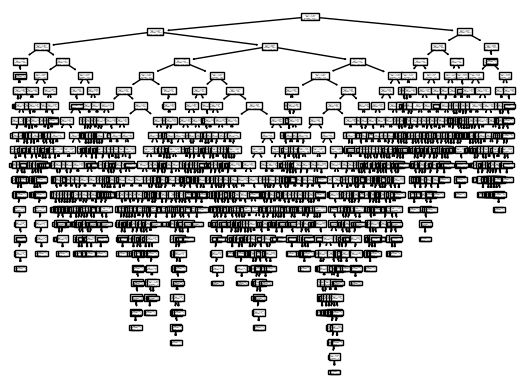

In [15]:
plt.figure()
plot_tree(dt)
plt.show()

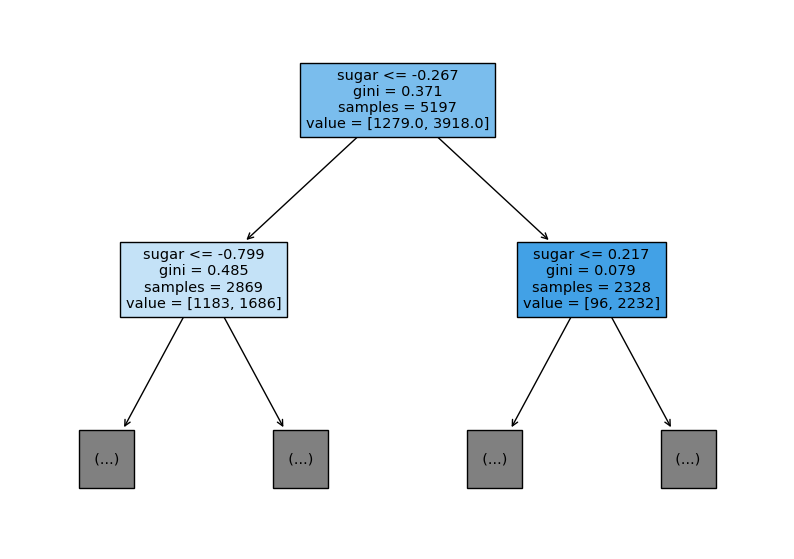

In [16]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled=True, feature_names = ["alcohol", "sugar", "pH"])
plt.show()